In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a class to represent a node on the graph

class Node():
    paths = []    
    def __init__(self, name, position = np.random.randint(100, size=2)):
        self.name = name
        self.position = position
    
    def __str__(self):
        return "Node " + str(self.name)+ " at " + str(self.position)
    
    def info(self):
        result = str(self) + " with paths: \n" 
        for i in self.paths:
            result= result + "\t" + str(i[0]) + "with distance " + str(i[1]) + "\n"
        return result

In [37]:
# Initialize the graph

numNodes = 6

nodes = [Node(i, np.random.randint(100, size=2)) for i in range(numNodes)]

for node in nodes:
    node.paths = []
    for other in nodes:
        if node.name != other.name:
            node.paths.append([other, np.sqrt(np.sum(np.square(node.position - other.position)))])

for i in nodes:
    print(i.info())

Node 0 at [27  3] with paths: 
	Node 1 at [26 49]with distance 46.010868281309364
	Node 2 at [86 73]with distance 91.54780172128658
	Node 3 at [75 34]with distance 57.14017850864661
	Node 4 at [20 30]with distance 27.892651361962706
	Node 5 at [46 95]with distance 93.94147114027967

Node 1 at [26 49] with paths: 
	Node 0 at [27  3]with distance 46.010868281309364
	Node 2 at [86 73]with distance 64.62197768561404
	Node 3 at [75 34]with distance 51.24451190127583
	Node 4 at [20 30]with distance 19.924858845171276
	Node 5 at [46 95]with distance 50.15974481593781

Node 2 at [86 73] with paths: 
	Node 0 at [27  3]with distance 91.54780172128658
	Node 1 at [26 49]with distance 64.62197768561404
	Node 3 at [75 34]with distance 40.52159917870962
	Node 4 at [20 30]with distance 78.77182237323191
	Node 5 at [46 95]with distance 45.65084884205331

Node 3 at [75 34] with paths: 
	Node 0 at [27  3]with distance 57.14017850864661
	Node 1 at [26 49]with distance 51.24451190127583
	Node 2 at [86 73]w

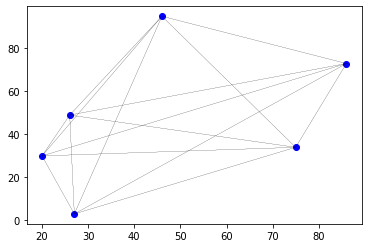

In [38]:
#print the graph as showcase
def printGraph(graph, paths=False):
    for node in graph:
        plt.plot(node.position[0], node.position[1],'bo')
        if paths:
            for path in node.paths:
                plt.plot([node.position[0], path[0].position[0]], [node.position[1], path[0].position[1]], 'k-', linewidth=.1)
        
printGraph(nodes, True)


[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
319.56869544894454
0 -> 4
4 -> 3
3 -> 0
0 -> 4
4 -> 3
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
300.6106639300634


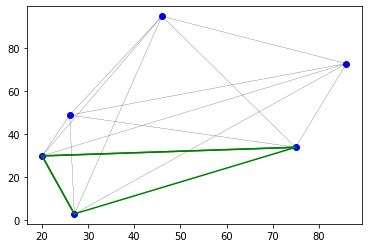

In [108]:
# choose a random path, and create two decomposed matrices based on it

class path():

    def initRandom(self, graph):
        self.graph = graph
        self.path = []
        pool = list(graph)
        
        while len(pool) > 0:
            i = np.random.randint(len(pool))
            self.path.append(pool.pop(i))
        
        self.path.append(self.path[0])
        
        self.matrix = self.getMatrix()
        self.valueMatrix = self.getValueMatrix()
    
    def printPath(self):
        self.updatePath()
        for i in range(0, len(self.path) - 1):
            path = self.path
            print(str(path[i].name) + " -> " + str(path[i+1].name))
            plt.plot([path[i].position[0], path[i+1].position[0]], [path[i].position[1], path[i+1].position[1]], 'g-')
    
    def getMatrix(self):
        compoundMatrix = (np.zeros((len(self.graph), len(self.graph))))
        for i in range(0, len(self.path) - 1):
            compoundMatrix[self.path[i].name][self.path[i+1].name] = 1
        return compoundMatrix
    
    def getValueMatrix(self):
        valueMatrix = (np.zeros((len(self.graph), len(self.graph))))
        for i, node in enumerate(self.graph):
            for j, other in enumerate(self.graph):
                valueMatrix[i][j] = np.sqrt(np.sum(np.square(node.position - other.position)))
        return valueMatrix
    
    def getPathLength(self):
        return np.sum(self.valueMatrix * self.matrix)
    
    def swapRow(self, x,y):
        self.matrix[[x,y]] = self.matrix[[y,x]]
        if self.matrix.trace() > 0:
            self.matrix[[x,y]] = self.matrix[[y,x]]
    
    def updatePath(self):
        current = 0
        path = []
        for i in range(len(self.graph)):
            path.append(self.graph[current])
            for j in range(len(self.graph)):
                if self.matrix[current][j] == 1:
                    current = j
                    break
        self.path = path
        

printGraph(nodes, True)
initPath = path()
initPath.initRandom(nodes)
#initPath.printPath()

print(initPath.matrix)
print(initPath.getPathLength())
initPath.swapRow(0,1)
initPath.printPath()
print(initPath.matrix)
print(initPath.getPathLength())
plt.show()

229.61350511043287
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
229.61350511043287
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
185.3088605880685
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
185.3088605880685
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
185.3088605880685
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
141.00421606570416
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
141.00421606570416
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
0 -> 2
2 -> 0
0 -> 2


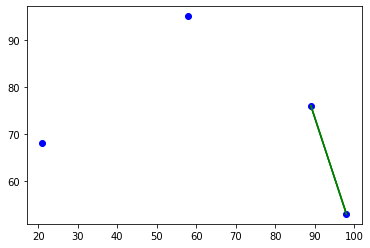

In [112]:
#Now, have a class for an actual graph, and optimize a path

class Graph():
    def __init__(self, numNodes):
        self.nodes = [Node(i, np.random.randint(100, size=2)) for i in range(numNodes)]
        
        for node in self.nodes:
            node.paths = []
            for other in self.nodes:
                if node.name != other.name:
                    node.paths.append([other, np.sqrt(np.sum(np.square(node.position - other.position)))])
                
        self.path = path()
        self.path.initRandom(self.nodes)
    
    def printGraph(self, paths=False):
        graph = self.nodes
        for node in graph:
            plt.plot(node.position[0], node.position[1],'bo')
            if paths:
                for path in node.paths:
                    plt.plot([node.position[0], path[0].position[0]], [node.position[1], path[0].position[1]], 'k-', linewidth=.1)
        
    
    def printPath(self):
        self.path.printPath()
    
    
    def step(self, temp):
        #This is where the magic happens
        #Calculate the current distance:
        
        currentDist = self.path.getPathLength()
        
        #Swap two paths
        i,j = np.random.randint(len(self.nodes)), np.random.randint(len(self.nodes))
        self.path.swapRow(i,j)
        
        #Swap back based on the new distance
        
        if self.path.getPathLength() > currentDist:
            self.path.swapRow(i,j)
        else:
            print(self.path.getPathLength())
        
                  
testGraph = Graph(4)

for i in range(10):
    testGraph.step(1)
    print(testGraph.path.matrix)



testGraph.printGraph()
testGraph.printPath()
plt.show()